<a href="https://colab.research.google.com/github/apriarami789/MachineLearning_MhdApriArami/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Mhd_Apri_Arami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [35]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
!git clone 'https://github.com/apriarami789/MachineLearning_MhdApriArami.git'

Cloning into 'MachineLearning_MhdApriArami'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 7.46 MiB | 28.18 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [13]:
from os import path
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
path = '/content/MachineLearning_MhdApriArami/data_clustering_scaler.csv'
df = pd.read_csv(path)

In [14]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Target
0,-0.973289,0.539322,1.211017,-1.221065,1.426568,-1.334408,-0.548117,-0.204333,0.006355,0
1,0.267271,0.539322,-0.501457,-1.221065,1.314511,-1.334408,0.300327,-0.204333,2.220339,4
2,-0.588943,0.539322,0.150914,1.254578,-1.430874,1.310538,-0.901635,-0.204333,-1.015247,1
3,-0.389542,0.539322,0.966378,1.254578,-1.038676,1.310538,-1.339997,-0.204333,0.891480,1
4,-0.705891,0.539322,0.558646,-1.221065,-1.486902,1.310538,0.738689,-0.204333,-1.102475,1


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [17]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
X = df.drop(['Target'], axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [26]:
# Buatlah model klasifikasi menggunakan Decision Tree
dt = DecisionTreeClassifier(criterion='entropy',random_state=300)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=300)

In [39]:
# Menyimpan Model
joblib.dump(dt,'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [28]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',n_jobs=-1,random_state=300)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=300)

Akurasi: 0.9847161572052402
Presisi: 0.9847161572052402
Recall: 0.9847161572052402
F1-Score: 0.9847161572052402
Confusion Matrix


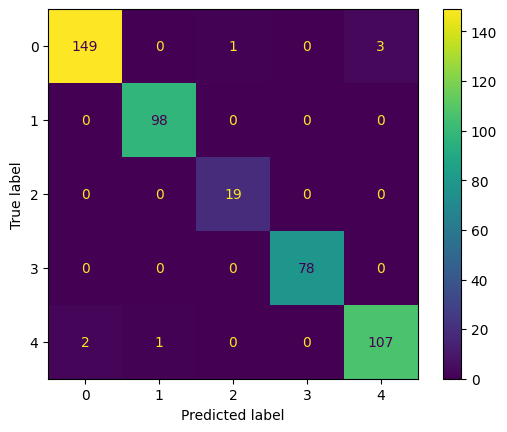

In [36]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
y_pred = dt.predict(X_test)
print('Akurasi:', accuracy_score(y_test, y_pred))
print('Presisi:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1-Score:', f1_score(y_test, y_pred, average='micro'))

print('Confusion Matrix')
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

Akurasi: 0.982532751091703
Presisi: 0.982532751091703
Recall: 0.982532751091703
F1-Score: 0.982532751091703
Confusion Matrix


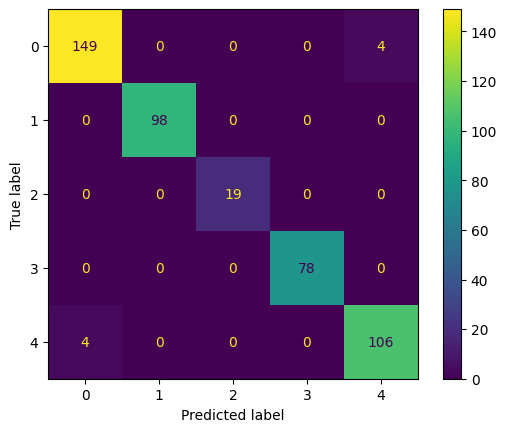

In [37]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
y_pred = rf.predict(X_test)
print('Akurasi:', accuracy_score(y_test, y_pred))
print('Presisi:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1-Score:', f1_score(y_test, y_pred, average='micro'))

print('Confusion Matrix')
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [38]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
joblib.dump(rf, 'explore_RandomForest_classification.h5')

['explore_RandomForest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [40]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10,50,100,150,200,250,300,350,400,500],
    'random_state': [300]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'n_estimators': 200, 'random_state': 300}


Akurasi (Best Model): 0.9847161572052402
Presisi (Best Model): 0.9847161572052402
Recall (Best Model): 0.9847161572052402
F1-Score (Best Model): 0.9847161572052402
Confusion Matrix (Best Model)


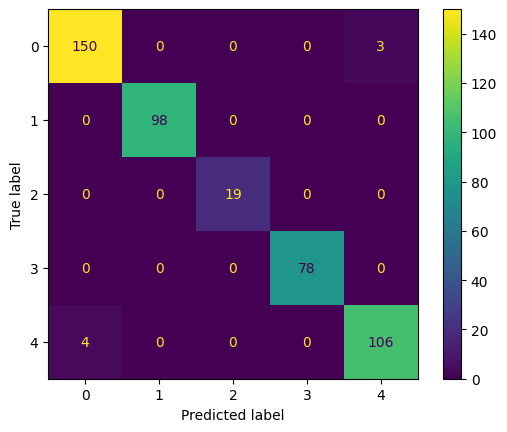

In [41]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print('Akurasi (Best Model):', accuracy_score(y_test, y_pred))
print('Presisi (Best Model):', precision_score(y_test, y_pred, average='micro'))
print('Recall (Best Model):', recall_score(y_test, y_pred, average='micro'))
print('F1-Score (Best Model):', f1_score(y_test, y_pred, average='micro'))

print('Confusion Matrix (Best Model)')
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)

In [42]:
# Menyimpan Model hasil tuning
joblib.dump(best_rf,'tuning_classification.h5')

['tuning_classification.h5']